# Segmentation Using K-Means

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers_Kmeans_PCA.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.rename({'Annual Income (k$)':'Income',  \
          'Spending Score (1-100)':'Spend_Score'}, axis=1,inplace=True)

<AxesSubplot:xlabel='Income', ylabel='Count'>

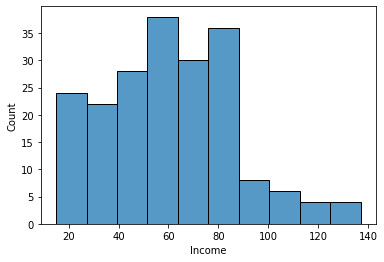

In [6]:
sns.histplot(data=df, x="Income")

In [7]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Income  Spend_Score
0             1    Male   19      15           39
1             2    Male   21      15           81
2             3  Female   20      16            6
3             4  Female   23      16           77
4             5  Female   31      17           40
..          ...     ...  ...     ...          ...
195         196  Female   35     120           79
196         197  Female   45     126           28
197         198    Male   32     126           74
198         199    Male   32     137           18
199         200    Male   30     137           83

[200 rows x 5 columns]>

## Traditional Segmentation¶


<AxesSubplot:xlabel='Income', ylabel='Count'>

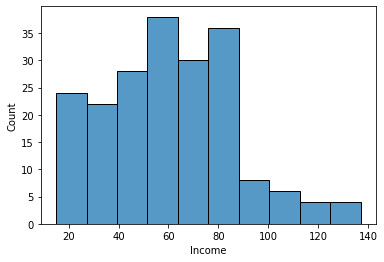

In [8]:
sns.histplot(data=df, x="Income")

In [9]:
## Creating three clusters based on the above understanding

df['Cluster']=np.where(df.Income >= 90, 'High_Earners',
                      np.where(df.Income < 50, 'Low_Income', 'Moderate_Income'))

In [10]:
df.groupby('Cluster')['Income'].describe()


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High_Earners,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low_Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate_Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


## Standardising the numerical attributes¶


#### In Machine Learning, StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
columns_to_scale = ['Age','Income','Spend_Score']
data_scaled=df.copy()

In [17]:
data_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [18]:
data_scaled[columns_to_scale].describe()

,Age,Income,Spend_Score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


## Euclidean Distance or Euclidean Measure¶


In [19]:
sel_cols=['Income','Spend_Score']
cust3=data_scaled[sel_cols].head(3)   
cust3

,Income,Spend_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [20]:
from scipy.spatial.distance import cdist

#####  Y = cdist(XA, XB, 'euclidean') Computes the distance between points using Euclidean distance (2-norm) as the distance metric between the points

In [21]:
cdist(cust3, cust3, metric='euclidean')

array([[0.        , 1.63050555, 1.28167999],
       [1.63050555, 0.        , 2.91186723],
       [1.28167999, 2.91186723, 0.        ]])

In [22]:
# verify the Eucliean distance between Income and Spend_Score

np.sqrt((-1.739+1.739)**2 + (-0.4348-1.1957)**2)

1.6305

In [23]:
cluster_cols=['Income','Spend_Score']
cust4=data_scaled[cluster_cols].head(3)
cust4

,Income,Spend_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


## Scatter Plot

From the plot, there are 5 natural clusters in the data. This tells us that we need to specify 5 as the number of clusters for the k-means algorithm


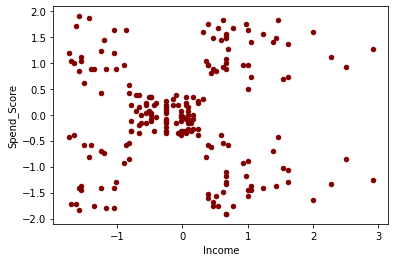

In [24]:
data_scaled.plot.scatter(x='Income', y='Spend_Score', \
     color='maroon')

print("From the plot, there are 5 natural clusters in the data. This tells us that we need to specify 5 as the number of clusters for the k-means algorithm")

In [25]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5, random_state=42)

print("The model instance is created. Note that no clustering has been performed on the data yet. n_clusters specifies the number of clusters to create as 5. Specifying a random state ensures that we get the same results on repeated executions since the k-means algorithm is not deterministic. 42 is an arbitrary choice")

The model instance is created. Note that no clustering has been performed on the data yet. n_clusters specifies the number of clusters to create as 5. Specifying a random state ensures that we get the same results on repeated executions since the k-means algorithm is not deterministic. 42 is an arbitrary choice


In [26]:
model.fit(data_scaled[cluster_cols])
data_scaled['Clusters']=model.predict(data_scaled[cluster_cols])
print("fit the model on the data using the columns in cluster_cols for the purpose. Using the predict method of the k-means model, assign the cluster for each customer to the 'Cluster' variable. Print the first three records of the data_scaled dataset")

fit the model on the data using the columns in cluster_cols for the purpose. Using the predict method of the k-means model, assign the cluster for each customer to the 'Cluster' variable. Print the first three records of the data_scaled dataset


In [27]:
data_scaled.head(3)

,CustomerID,Gender,Age,Income,Spend_Score,Cluster,Clusters
0,1,Male,-1.424569,-1.738999,-0.434801,Low_Income,2
1,2,Male,-1.281035,-1.738999,1.195704,Low_Income,3
2,3,Female,-1.352802,-1.700830,-1.715913,Low_Income,2


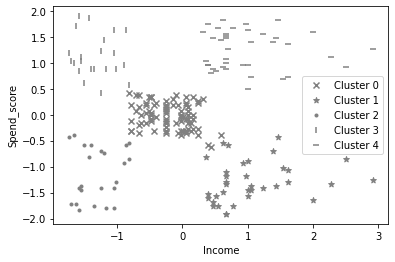

In [28]:
markers = ['x', '*', '.','|','_']

for clust in range(5):
    temp = data_scaled[data_scaled.Clusters == clust]
    plt.scatter(temp.Income, temp.Spend_Score, \
                marker=markers[clust], \
                color = 'gray',\
                label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

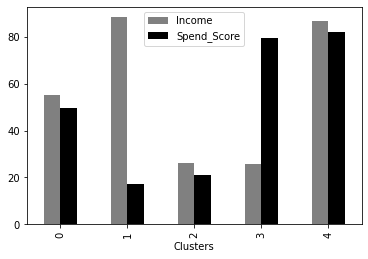

In [29]:
df['Clusters']=data_scaled.Clusters
df.groupby('Clusters')[['Income','Spend_Score']].mean().plot.bar(color=['gray','black'])
plt.show()